In [1]:
import pandas as pd
docs = pd.read_csv('movie_review_train.csv')
docs.head()

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...


In [2]:
len(docs)

1600

In [3]:
Pos_Neg = docs['class'].value_counts()


In [4]:
Pos_Neg

Pos    800
Neg    800
Name: class, dtype: int64

In [5]:
print("Neg rate is about {0}%".format(
round(Pos_Neg[1]/float(Pos_Neg[0]+Pos_Neg[1])*100),2))

Neg rate is about 50%


In [6]:
docs['label'] = docs['class'].map({'Pos': 1, 'Neg': 0})

In [7]:
docs.head()

,class,text,label
0,Pos,a common complaint amongst film critics is ...,1
1,Pos,whew this film oozes energy the kind of b...,1
2,Pos,steven spielberg s amistad which is bas...,1
3,Pos,he has spent his entire life in an awful litt...,1
4,Pos,being that it is a foreign language film with...,1


In [8]:
docs = docs.drop('class', axis=1)

In [9]:
docs.head()

,text,label
0,a common complaint amongst film critics is ...,1
1,whew this film oozes energy the kind of b...,1
2,steven spielberg s amistad which is bas...,1
3,he has spent his entire life in an awful litt...,1
4,being that it is a foreign language film with...,1


In [10]:
X = docs.text
y = docs.label
print(X.shape)
print(y.shape)

(1600,)
(1600,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
X_train.head()

1145     this movie about two dysfunctional families n...
73       felix   sami bouajila     the siege     lives...
446      vampire lore and legend has always been a pop...
399      kevin smith is like a big kid    his humor is...
647      bruce lee was a bigger than life martial arti...
Name: text, dtype: object

In [13]:
#vectorize the sentences, removing stopwords
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words='english')

In [14]:
vec

CountVectorizer(stop_words='english')

In [15]:
vec.fit(X_train)

CountVectorizer(stop_words='english')

In [16]:
help(vec)

Help on CountVectorizer in module sklearn.feature_extraction.text object:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  -----

In [17]:
vec.vocabulary_

{'movie': 18546,
 'dysfunctional': 8768,
 'families': 10177,
 'really': 22761,
 'gets': 11728,
 'ground': 12343,
 'despite': 7542,
 'good': 12030,
 'performances': 20704,
 'basically': 2466,
 'competent': 5636,
 'cast': 4442,
 'eddie': 8868,
 'sean': 24854,
 'penn': 20645,
 'maureen': 17485,
 'robin': 23922,
 'wright': 31536,
 'happily': 12699,
 'married': 17322,
 'couple': 6336,
 'luck': 16831,
 'living': 16568,
 'rented': 23298,
 'rooms': 24044,
 'seedier': 24921,
 'unnamed': 29896,
 'city': 5089,
 'spend': 26480,
 'little': 16550,
 'income': 14176,
 'local': 16600,
 'bar': 2368,
 'owned': 20137,
 'shorty': 25433,
 'stanton': 26812,
 'best': 2843,
 'friend': 11243,
 'wife': 31212,
 'georgie': 11696,
 'mazar': 17510,
 'share': 25243,
 'odd': 19539,
 'relationship': 23156,
 'marked': 17291,
 'frequent': 11220,
 'disappearances': 7869,
 'return': 23608,
 'promises': 21985,
 'world': 31467,
 'professes': 21915,
 'undying': 29710,
 'love': 16773,
 'manic': 17182,
 'reunions': 23615,
 'soo

In [18]:
len(vec.vocabulary_.keys())

31849

In [19]:
# transforming the train and test datasets
X_train_transformed = vec.transform(X_train)
#X_test_transformed = vec.transform(X_test)

In [20]:
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 8)	1
  (0, 454)	1
  (0, 1466)	1
  (0, 1936)	1
  (0, 2060)	1
  (0, 2172)	1
  (0, 2235)	1
  (0, 2368)	1
  (0, 2466)	1
  (0, 2731)	1
  (0, 2843)	1
  (0, 3699)	1
  (0, 3788)	1
  (0, 4095)	1
  (0, 4442)	1
  (0, 4896)	1
  (0, 4948)	1
  (0, 4950)	1
  (0, 5089)	1
  (0, 5507)	1
  (0, 5522)	1
  (0, 5636)	1
  (0, 5673)	1
  (0, 6133)	1
  (0, 6160)	1
  :	:
  (1199, 26287)	2
  (1199, 26624)	1
  (1199, 26958)	1
  (1199, 27090)	1
  (1199, 27337)	3
  (1199, 27375)	1
  (1199, 27455)	1
  (1199, 27845)	1
  (1199, 27939)	1
  (1199, 27960)	1
  (1199, 28072)	1
  (1199, 28076)	1
  (1199, 28437)	1
  (1199, 28456)	1
  (1199, 28638)	1
  (1199, 29261)	1
  (1199, 29267)	1
  (1199, 29949)	1
  (1199, 30253)	1
  (1199, 30412)	1
  (1199, 30939)	1
  (1199, 31202)	1
  (1199, 31360)	1
  (1199, 31467)	2
  (1199, 31647)	1


In [21]:
X_test

75       after the press screening of   moulin rouge  ...
1284     any remake of an alfred hitchcock film is at ...
408      magnolia left me relling from the theatre   s...
1282     often similar to a little boy lost in a park ...
1447     the previews for the movie are pretty good   ...
                              ...                        
1566     warren beatty   diane keaton   goldie hawn an...
1355     battlefield earth is the worst film of 2000  ...
1205     a fullyloaded entertainment review   website ...
12       ingredients   neophyte lawyer   legal situati...
584      it s no secret in the motion picture industry...
Name: text, Length: 400, dtype: object

In [22]:
X_test_transformed = vec.transform(X_test)

In [23]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)


In [24]:
mnb

MultinomialNB()

In [25]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.825

In [26]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)
# help(metrics.confusion_matrix)

array([[167,  37],
       [ 33, 163]], dtype=int64)

In [27]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[167  37]
 [ 33 163]]


In [28]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8316326530612245


In [29]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.8186274509803921


In [30]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.815
0.815


In [31]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.815
PRECISION SCORE : 0.815
RECALL SCORE : 0.8316326530612245
F1 SCORE : 0.8232323232323232


In [32]:
y_pred_class

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [33]:
y_pred_proba

array([[4.45408118e-22, 1.00000000e+00],
       [1.00000000e+00, 3.34207754e-10],
       [1.86856581e-06, 9.99998131e-01],
       [1.30409473e-01, 8.69590527e-01],
       [9.99957957e-01, 4.20428783e-05],
       [9.99994135e-01, 5.86539808e-06],
       [1.00000000e+00, 3.56876428e-19],
       [1.18739529e-26, 1.00000000e+00],
       [3.51546806e-04, 9.99648453e-01],
       [1.00000000e+00, 4.47291961e-12],
       [1.00000000e+00, 1.12860095e-21],
       [1.27549030e-20, 1.00000000e+00],
       [1.00000000e+00, 3.21590715e-15],
       [1.00000000e+00, 5.07905199e-72],
       [4.74777943e-08, 9.99999953e-01],
       [5.59492872e-01, 4.40507128e-01],
       [9.99999908e-01, 9.24765456e-08],
       [9.99993074e-01, 6.92591730e-06],
       [1.00000000e+00, 7.03695392e-14],
       [2.97820605e-57, 1.00000000e+00],
       [9.00720332e-15, 1.00000000e+00],
       [9.99880519e-01, 1.19481050e-04],
       [9.51099817e-07, 9.99999049e-01],
       [1.00000000e+00, 1.51397776e-12],
       [6.764111

In [34]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [35]:
# area under the curve
print (roc_auc)

0.8947829131652661


In [36]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.454082,0.049020
2,1.000000e+00,0.464286,0.049020
3,1.000000e+00,0.474490,0.049020
4,1.000000e+00,0.484694,0.049020
...,...,...,...
82,9.553986e-23,0.989796,0.833333
83,7.646669e-23,0.994898,0.833333
84,4.092430e-34,0.994898,0.960784
85,8.016768e-35,1.000000,0.960784


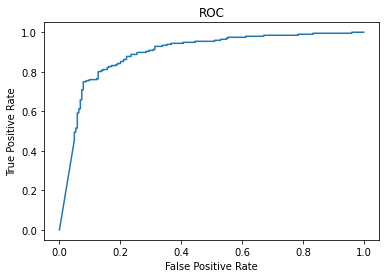

In [37]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)